In [2]:
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from PIL import Image
import pickle

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
dataset = pd.read_csv("D:\\PESU\\Sem_V\\AI\\Hackathon\\localization_dataset.csv")

In [4]:
dataset.head()

,Image,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,2008_000002,255,255,255,255,255,255,255,255,254,...,0,0,0,0,0,0,0,0,0,0
1,2008_000007,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
2,2008_000016,66,70,78,82,75,68,79,96,96,...,0,0,0,0,0,0,0,0,0,0
3,2008_000021,127,127,127,128,128,128,129,129,130,...,0,0,0,0,0,0,0,0,0,0
4,2008_000027,6,68,80,29,25,45,129,26,75,...,0,0,0,0,0,0,0,0,0,0


In [5]:
with open("D:\\PESU\\Sem_V\\AI\\Hackathon\\image_bounds.pickle", "rb") as f:
    bounds = pickle.load(f)

In [6]:
with open("D:\\PESU\\Sem_V\\AI\\Hackathon\\image_labelEncoded.pickle", "rb") as f:
    labels = pickle.load(f)

In [7]:
labels

{'2010_001647': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2010_000906': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2010_000145': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2008_006951': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2010_003483': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2009_002562': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 '2008_007749': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 '2009_002531': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2010_003255': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2009_001462': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 '2010_002271': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 '2009_004392': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '2010_000898': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2008_007907': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '2009_000871': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '2010_000075': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
dataset[dataset["Image"] == "2010_005496"]

,Image,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
3992,2010_005496,180,224,171,192,196,225,183,157,201,...,0,0,0,0,0,0,0,0,0,0


In [9]:
temp_objects = []
for i in bounds:
    temp2 = {}
    temp2['Image'] = i
    temp2['Y1'] = np.array(labels[i]).astype("float32")
    temp_objects.append(temp2)
temp_objects[0:3]

[{'Image': '2010_001647',
  'Y1': array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.], dtype=float32)},
 {'Image': '2010_000906',
  'Y1': array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.], dtype=float32)},
 {'Image': '2008_005310',
  'Y1': array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.], dtype=float32)}]

In [10]:
temp_bounds = []
for i in bounds:
    temp2 = {}
    temp2['Image'] = i
    temp2['Y2'] = np.array(bounds[i]).astype("float32")
    temp_bounds.append(temp2)
temp_bounds[0:3]

[{'Image': '2010_001647',
  'Y2': array([   2.,   15.,  125.,   72.], dtype=float32)},
 {'Image': '2010_000906',
  'Y2': array([ 39.,  24.,  91.,  65.], dtype=float32)},
 {'Image': '2008_005310',
  'Y2': array([ 12.,   8.,  78.,  47.], dtype=float32)}]

In [39]:
output_df_objects = pd.DataFrame(temp_objects)

In [40]:
output_df_objects.head()

,Image,Y1
0,2010_001647,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,2010_000906,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2008_005310,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2008_006951,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2008_006908,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [41]:
output_df_bounds = pd.DataFrame(temp_bounds)

In [42]:
output_df_bounds.head()

,Image,Y2
0,2010_001647,"[2.0, 15.0, 125.0, 72.0]"
1,2010_000906,"[39.0, 24.0, 91.0, 65.0]"
2,2008_005310,"[12.0, 8.0, 78.0, 47.0]"
3,2008_006951,"[32.0, 25.0, 118.0, 51.0]"
4,2008_006908,"[11.0, 24.0, 64.0, 74.0]"


In [43]:
joined_df_objects = pd.merge(dataset, output_df_objects, on='Image')
joined_df_bounds = pd.merge(dataset, output_df_bounds, on='Image')

In [44]:
joined_df_objects.head()

,Image,0,1,2,3,4,5,6,7,8,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Y1
0,2008_000002,255,255,255,255,255,255,255,255,254,...,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2008_000007,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2008_000016,66,70,78,82,75,68,79,96,96,...,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2008_000021,127,127,127,128,128,128,129,129,130,...,0,0,0,0,0,0,0,0,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2008_000027,6,68,80,29,25,45,129,26,75,...,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


In [45]:
joined_df_bounds.head()

,Image,0,1,2,3,4,5,6,7,8,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Y2
0,2008_000002,255,255,255,255,255,255,255,255,254,...,0,0,0,0,0,0,0,0,0,"[8.0, 2.0, 112.0, 73.0]"
1,2008_000007,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,"[0.0, 57.0, 107.0, 73.0]"
2,2008_000016,66,70,78,82,75,68,79,96,96,...,0,0,0,0,0,0,0,0,0,"[22.0, 3.0, 98.0, 88.0]"
3,2008_000021,127,127,127,128,128,128,129,129,130,...,0,0,0,0,0,0,0,0,0,"[3.0, 37.0, 118.0, 72.0]"
4,2008_000027,6,68,80,29,25,45,129,26,75,...,0,0,0,0,0,0,0,0,0,"[2.0, 8.0, 125.0, 93.0]"


In [46]:
new_train_X = joined_df_bounds.iloc[:,1:-1]
new_train_Y = joined_df_bounds.iloc[:,-1]

In [47]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(new_train_X, new_train_Y, test_size=0.20, random_state=seed)

X_train = X_train/255
X_test = X_test/255

In [48]:
X_dash = X_train.values.reshape(X_train.shape[0], 128, 128, 1).astype('float32')
X_test_dash = X_test.values.reshape(X_test.shape[0], 128, 128, 1).astype('float32')

In [49]:
X_dash.shape

(3304, 128, 128, 1)

In [50]:
l = []
for x in y_train:
    l.append(list(x))
Y = np.array(l)

In [51]:
Y.shape

(3304, 4)

In [53]:

def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1), 
                     activation='relu', name="conv_1")) # 32 implies 32 bit image
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (4, 4), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(4, 4), name="pool_2"))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(150, activation='relu', name="dense_1"))
    model.add(Dense(80, activation='relu', name="dense_2"))
    model.add(Dense(4, name="modeloutput"))
    
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model


In [54]:
'''
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1), 
                     activation='relu', name="conv_1")) # 32 implies 32 bit image
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (4, 4), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(4, 4), name="pool_2"))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(200, activation='relu', name="dense_1"))
    model.add(Dense(100, activation='relu', name="dense_2"))
    model.add(Dense(15, activation='softmax', name="modeloutput"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
'''

'\ndef cnn_model():\n    model = Sequential()\n    model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1), \n                     activation=\'relu\', name="conv_1")) # 32 implies 32 bit image\n    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))\n    model.add(Conv2D(64, (4, 4), activation=\'relu\', name="conv_2"))\n    model.add(MaxPooling2D(pool_size=(4, 4), name="pool_2"))\n    model.add(Dropout(0.3))\n    model.add(Flatten())\n    model.add(Dense(200, activation=\'relu\', name="dense_1"))\n    model.add(Dense(100, activation=\'relu\', name="dense_2"))\n    model.add(Dense(15, activation=\'softmax\', name="modeloutput"))\n    \n    model.compile(loss=\'categorical_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n    return model\n'

In [59]:
model = cnn_model()

early_stopping_monitor = EarlyStopping(patience=2)

epochs = 5
batch_size = 200
history = model.fit(X_dash, Y, validation_split=0.20, epochs=epochs, batch_size=batch_size, 
                    callbacks=[early_stopping_monitor], verbose=2)

Train on 2643 samples, validate on 661 samples
Epoch 1/5
55s - loss: 2555.2854 - acc: 0.6644 - val_loss: 620.3956 - val_acc: 0.7534
Epoch 2/5
55s - loss: 651.8260 - acc: 0.8524 - val_loss: 581.7233 - val_acc: 0.8502
Epoch 3/5
55s - loss: 532.4503 - acc: 0.8717 - val_loss: 543.2365 - val_acc: 0.8669
Epoch 4/5
56s - loss: 490.2619 - acc: 0.8763 - val_loss: 510.4997 - val_acc: 0.8759
Epoch 5/5
56s - loss: 452.1816 - acc: 0.8721 - val_loss: 474.8744 - val_acc: 0.8699


In [60]:
m = []
for x in y_test:
    m.append(list(x))
Y_test = np.array(m)

In [61]:
Y_test.shape

(826, 4)

In [62]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(X_test_dash, Y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.14%


# Prediction

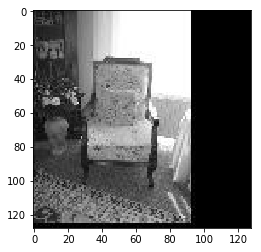

In [92]:
img = Image.open("D:\PESU\Sem_V\AI\Hackathon\\chair_gray.jpg")
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [93]:
to_predict = np.reshape(img, [1, 128, 128, 1]).astype("float32")
to_predict = to_predict/255

In [94]:
to_predict.shape

(1, 128, 128, 1)

In [95]:
predict_class = model.predict(to_predict)
print(predict_class)

[[  20.75973129   25.22187614   86.70079803  103.69300079]]
